In [32]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt 
import re
from matplotlib.offsetbox import AnchoredText
sns.set_style("white")
sns.set_context("talk")
%matplotlib inline 

In [33]:
df = pd.read_csv('raw_fluor_data.csv')

In [34]:
df_tm = pd.read_csv('tm.csv', header=1)

In [35]:
temps = list(df['X'])

In [36]:
col_to_keep = [x for x in df.columns if not re.match('X', x)]

In [37]:
df_data = df[col_to_keep]

In [38]:
df_deriv= pd.read_csv("first_derivative_data.csv")
col_to_keep_deriv = [x for x in df_deriv.columns if not re.match('X', x)]
df_data_deriv = df_deriv[col_to_keep_deriv]
temps_deriv = list(df_deriv['X'])

In [39]:
list_of_wells = [x.split(':')[0] for x in col_to_keep]
list_of_kinases = ['WT Abl', 'WT Abl', 'WT Abl', 'WT Abl', 'WT Abl', 'WT Abl', "I403T Abl", "I403T Abl", "I403T Abl", 'MK14', 'MK14', 'MK14']
kinase_dict= dict(zip(list_of_wells, list_of_kinases))


NameError: name 'dictionary' is not defined

In [40]:
df_tm

,Include,Color,Pos,Name,Tm1,Tm2,Status
0,True,255,A1,Sample 1,52.15,NaN,* - Manually edited
1,True,255,A2,Sample 2,51.91,NaN,* - Manually edited
2,True,255,B1,Sample 25,52.15,NaN,* - Manually edited
3,True,255,B2,Sample 26,51.83,NaN,* - Manually edited
4,True,255,B3,Sample 27,52.29,NaN,* - Manually edited
5,True,255,A3,Sample 3,52.31,NaN,* - Manually edited
6,True,255,C1,Sample 49,52.37,NaN,* - Manually edited
7,True,255,C2,Sample 50,51.73,NaN,* - Manually edited
8,True,255,C3,Sample 51,52.29,NaN,* - Manually edited
9,True,255,D1,Sample 73,44.17,NaN,* - Manually edited


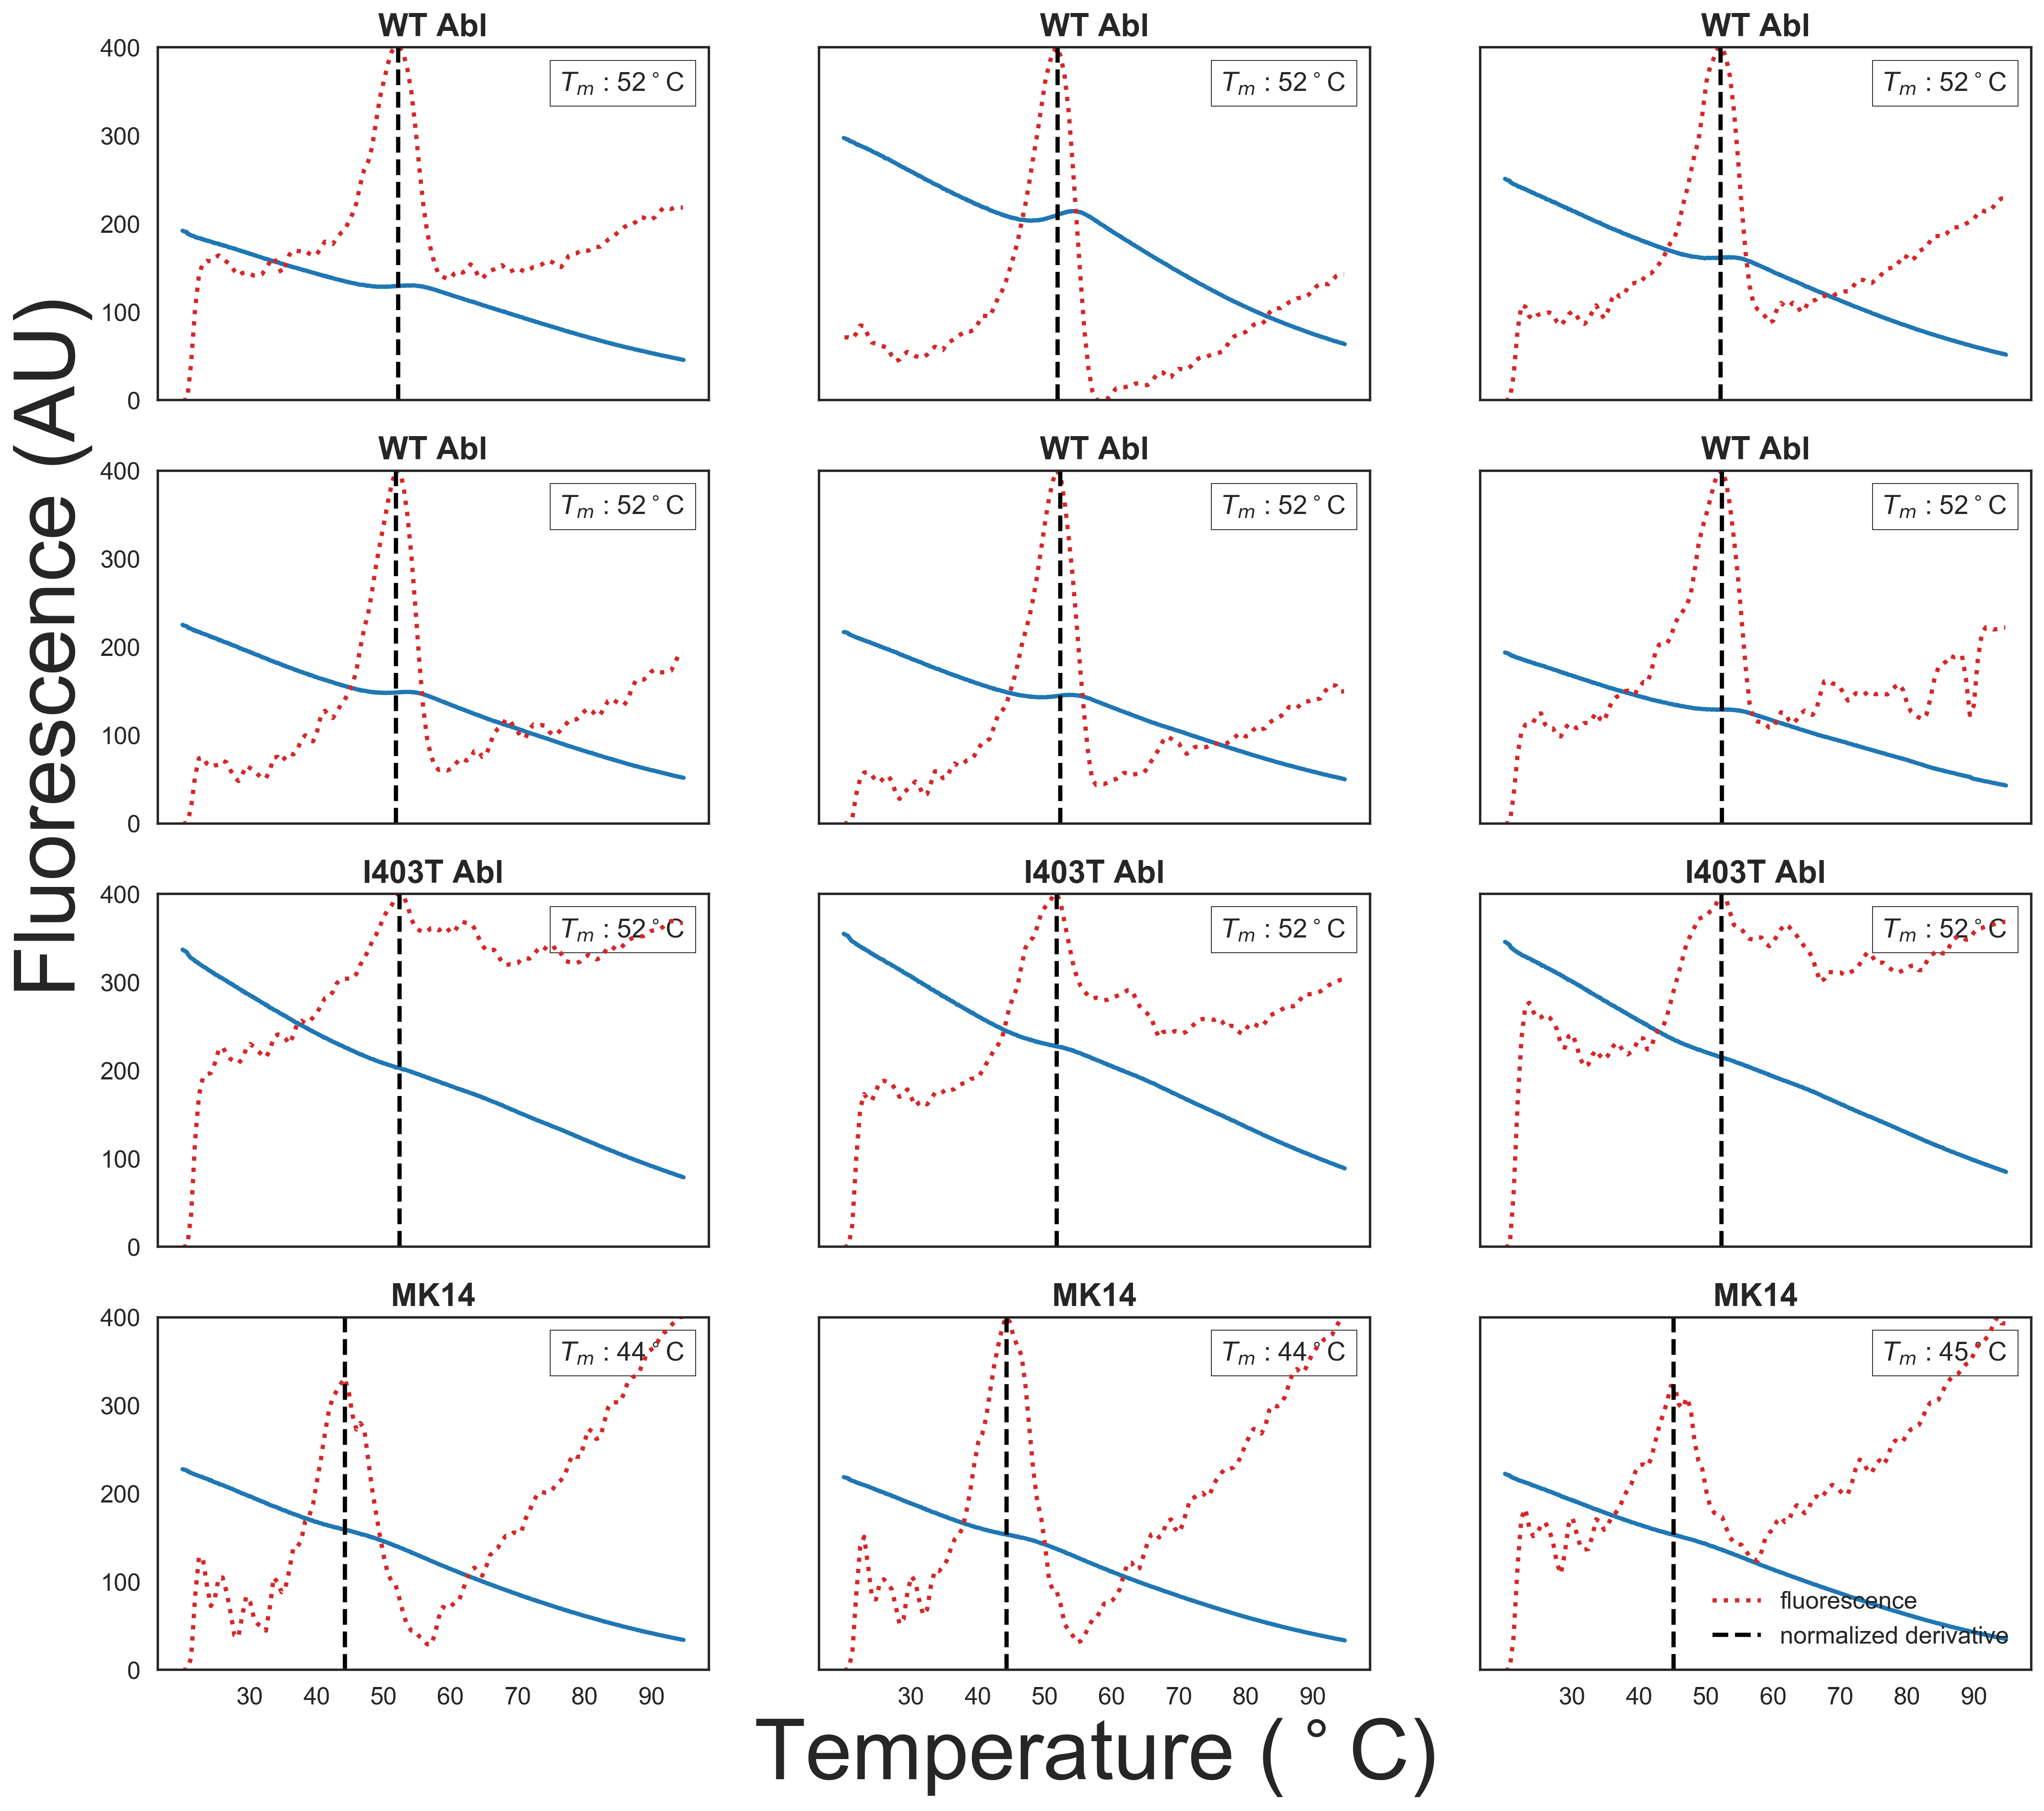

In [43]:
current_palette = sns.color_palette()

max_fluorescence = 400

fluorescence_color = current_palette[0]
deriv_color = current_palette[3]
tm_color = 'black'
    
fig = plt.figure(figsize=(18,16), dpi=300)
for i,col in enumerate(col_to_keep):
    well = list_of_wells[i]
    index = i + 1
    ax1 = fig.add_subplot(4,3,index)
    
    if i == 10: 
        plt.xlabel('Temperature ($^\circ$C)', fontsize=45)
    if i == 3: 
        plt.ylabel('Fluorescence (AU)', fontsize=45)
    
    ax2 = ax1.twinx()
    #plt.plot(temps, df_data[col], color='blue')

    # Plot fluorescence
    y = df_data[col]
    #y = (y - y.min()) / (y.max() - y.min());
    ax1.plot(temps, y, color=fluorescence_color)
    ax1.set_ylim(0, max_fluorescence)
    ax1.yaxis.set_ticks([0, 100, 200, 300, 400])
    
    # Title subplot
    plt.title('%s' % kinase_dict[well], fontsize=17, fontweight='bold')

    # Plot normalized derivative
    y = -df_data_deriv[col]
    y = (y - y.min()) / (y.max() - y.min())
    ax2.plot(temps_deriv, y, color=current_palette[3], linestyle=':')
    ax2.tick_params('n', colors='r')
    ax2.set_ylim(0, 1)
    ax2.yaxis.set_ticks([])    
    
    if i < 9:
        ax1.xaxis.set_ticks([])
        ax2.xaxis.set_ticks([])
    else:
        ax1.xaxis.set_ticks([30, 40, 50, 60, 70, 80, 90])
        
    if i not in [0, 3, 6, 9, 12]:
        ax1.yaxis.set_ticks([])
        ax2.yaxis.set_ticks([])
    
    # Plot Tms
    plt.axvline(x=list(df_tm['Tm1'])[i], color=tm_color, linestyle='--')
    if str(list(df_tm['Tm2'])[i]) != 'nan': 
        ax1.axvline(x=list(df_tm4['Tm2'])[i], color=tm_color, linestyle='--')
    
        
    # Plot Tms in legend
    if str(list(df_tm['Tm2'])[i]) != 'nan': 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C, %.0f$^\circ$C " % (list(df_tm['Tm1'])[i], list(df_tm['Tm2'])[i]) , loc=1, prop=dict(size=15))
    else: 
        anchored_text = AnchoredText("$T_m$ : %.0f$^\circ$C " % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=14))
    #anchored_text = AnchoredText("$T_m^1$ : %.0f$^\circ$C" % (list(df_tm['Tm1'])[i]) , loc=1, prop=dict(size=15))
    
    #anchored_text2 = AnchoredText('%s' % (index),  loc=2, prop=dict(size=14))
    ax1.add_artist(anchored_text)
    #ax1.add_artist(anchored_text2)


plt.legend(['fluorescence', 'normalized derivative']);

# Save figure
#fig.tight_layout()
fig.savefig('I403T_tm.pdf', bbox_inches='tight', dpi=300)